In [1]:
from ipywidgets import interact, IntSlider
import sys
%pylab inline
import matplotlib
matplotlib.rcParams['font.size'] = 14

/Users/sgkang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


# DC example: Gradient array with single source

$$\vec{j} = \sigma \vec{e}$$

$$\vec{e} = -\nabla \phi$$

$$\nabla \cdot \vec{j} = -\vec{j}_s = I_0 (\delta(\vec{r}-\vec{r}_+)-\delta(\vec{r}-\vec{r}_-))$$

$$\vec{j} \cdot \hat{n} \ \Big|_{\partial \Omega} = 0$$ 

- $\vec{j}$: Current density (A/m $^2$)

- $\vec{e}$: Electric field (V/m)

- $I_0$: Current (A)

- $\delta$: Volumetric delta function (m $^{-3}$)

<img src="../images/DCIP_kimberlites.png" width=500> </img>

Python files for Forward and Inversion:
    
    NEED TO UPDATE LINKS
    
- Forward: https://github.com/simpeg/presentations/blob/ATEM/SciPy2016/notebooks/ATEM/TKCATEMfwd.py
- Inversion: https://github.com/simpeg/presentations/blob/ATEM/SciPy2016/notebooks/ATEM/TKCATEMinv.py

## Setup mesh, load model, design survey, and forward model data

In [2]:
run TKCExample_DCfwd.py

### Re-running the inverison will take a few minutes. Only uncomment the run statement below if you wish to re-run the inversion and see the output. Pickled results can be loaded below without re-running the inversion.

In [3]:
# run TKCExample_DCinv.py

## Visualize synthetic conductivity model

(<matplotlib.axes._subplots.AxesSubplot at 0x10e171650>,
 (<matplotlib.collections.QuadMesh at 0x10e1c3dd0>,))

<function __main__.<lambda>>

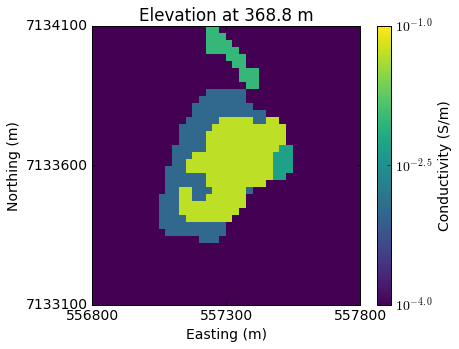

In [4]:
interact(lambda indz: viz(mesh, sigma, indz, airind=airind, normal="Z", xc=xc,yc=yc,zc=zc), indz=IntSlider(min=0, max=mesh.nCz-1,step=1, value=28))

(<matplotlib.axes._subplots.AxesSubplot at 0x1139754d0>,
 (<matplotlib.collections.QuadMesh at 0x114d8d710>,))

<function __main__.<lambda>>

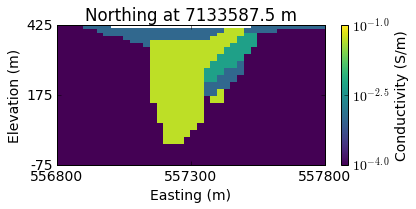

In [5]:
interact(lambda indy: viz(mesh, sigma, indy, airind=airind, normal="Y", xc=xc,yc=yc,zc=zc), indy=IntSlider(min=0, max=mesh.nCy-1,step=1, value=30))

## View electrode geometry for Gradient arrray

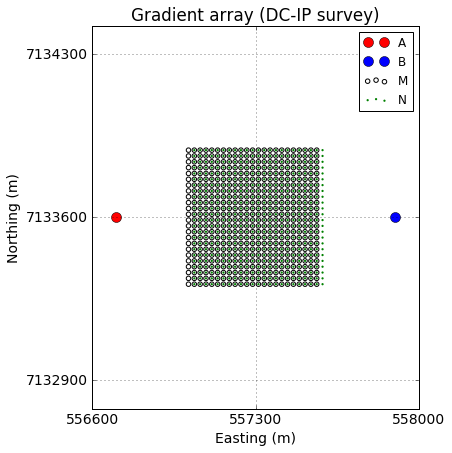

In [6]:
fig, ax = plt.subplots(1,1, figsize=(5*1.3,5*1.3))
plt.xlabel("Easting (m)"); plt.ylabel("Northing (m)")
ax.plot(Aloc1_x[0], Aloc1_x[1], 'ro', ms=10)
ax.plot(Bloc1_x[0], Bloc1_x[1], 'bo', ms=10)
ax.scatter(Mx[:,0], Mx[:,1],s=20, edgecolors="k", facecolors="none")
ax.scatter(Nx[:,0], Nx[:,1],s=5, edgecolors="none", facecolors="g")
ax.legend(("A", "B", "M", "N"), fontsize=12)
xmin, xmax = -700+xc, 700+xc
ymin, ymax = -700+yc, 700+yc
ax.set_xticks(np.linspace(xmin, xmax, 3))
ax.set_yticks(np.linspace(ymin, ymax, 3))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.axis('equal')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")
ax.set_title("Gradient array (DC-IP survey)")
ax.grid(True)
plt.tight_layout()
# fig.savefig("./images/GradientArray", dpi=400)

## Compute fields
1. Current density: $\mathbf{j} = \sigma \mathbf{e} = -\sigma \nabla \phi$
2. Charge:  $\int_V \epsilon_0 \nabla \cdot \vec{e} dV = \int_V\rho_v dV$ 

$\rho_v$: Volumetric charge density (C/m $^3$), $\epsilon_0$: Dielectric constant in free-space (F/m)

3. Secondary potential: $\phi_s = \phi-\phi_0$

$ \phi = F[\sigma] $ , $\phi_0 = F[\sigma_{halfspace}] $



In [27]:
def dataPanelPlot(indz,indy):
    fig = plt.figure(figsize(11, 8))
    Imin, Imax = 2.8e-8,2.7e-5
    Qmin, Qmax =  -18e-11, 3.0e-10
    Vsmin, Vsmax = -2., 2.
    dI, dQ, dV = (Imax-Imin)*0.2, (Qmax-Qmin)*0.2, (Vsmax-Vsmin)*0.2
    xmin, xmax = -700+xc, 700+xc
    ymin, ymax = -700+yc, 700+yc
    zmin, zmax = -700+zc, 0+zc
#     indz = 28
#     indy = 31
    matplotlib.rcParams['font.size'] = 10
    # Axis label
    x = np.linspace(xmin+200, xmax-200,3)

    # Currents z-section
    ax1 = plt.subplot(1,1,1)
    pos =  ax1.get_position()
    ax1.set_position([pos.x0-0.1, pos.y0+0.3,  pos.width*0.5, pos.height*0.5])
    ax1,dat1 = vizEJ(mesh, sigma, indz, f=f, airind=airind, src=src1, normal="Z", ftype="J", xc=xc, yc=yc, zc=zc, clim=(Imin, Imax), ax=ax1, cb=False)
    plt.gca().set_aspect('equal')
    ax1.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
    ax1.xaxis.set_visible(False)
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    ax1.set_ylabel('Northing (m)')

    # Cuurents y-section
    pos =  ax1.get_position()
    ax2 = fig.add_axes([pos.x0+0.0525, pos.y0 - 0.36,  pos.width*0.725, pos.height])
    ax2, dat2 = vizEJ(mesh, sigma, indy, f=f, airind=airind, src=src1, normal="Y", ftype="J", xc=xc, yc=yc, zc=zc, clim=(Imin, Imax), ax=ax2, cb=False)
    plt.gca().set_aspect('equal')
    ax2.set_title(("Slice at y=%.1f m")%(mesh.vectorCCy[indy]))
    ax2.set_xlim(xmin, xmax)
    ax2.set_ylim(zmin, zmax)
    ax2.set_xticks(map(int, x))
    ax2.set_xticklabels(map(str, map(int, x)),size=12)
    ax2.set_xlabel('Easting (m)')
    ax2.set_ylabel('Elev. (m)')

    # Currents colorbar
    cbI = plt.colorbar(dat1[0],orientation="horizontal", format="%1.1e", ticks=np.linspace(Imin+dI, Imax-dI, 3))
    cbI_label = "Electric currents (V/m)"
    cbI.set_label(cbI_label)

    # Charges z-section
    ax3 = fig.add_axes([pos.x0+0.3, pos.y0,  pos.width, pos.height])
    ax3,dat3 = vizEJ(mesh, sigma, indz, f=f, airind=airind, src=src1, normal="Z", ftype="charg", xc=xc, yc=yc, zc=zc, clim=(Qmin, Qmax), ax=ax3, cb=False)
    plt.gca().set_aspect('equal')
    ax3.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
    ax3.xaxis.set_visible(False)
    ax3.yaxis.set_visible(False)
    ax3.set_xlim(xmin, xmax)
    ax3.set_ylim(ymin, ymax)

    # Charges y-section
    ax4 = fig.add_axes([pos.x0+0.3525, pos.y0 - 0.36,  pos.width*0.725, pos.height])
    ax4, dat4 = vizEJ(mesh, sigma, indy, f=f, airind=airind, src=src1, normal="Y", ftype="charg", xc=xc, yc=yc, zc=zc, clim=(Qmin, Qmax), ax=ax4, cb=False)
    plt.gca().set_aspect('equal')
    ax4.set_title(("Slice at y=%.1f m")%(mesh.vectorCCy[indy]))
    ax4.yaxis.set_visible(False)
    ax4.set_xlim(xmin, xmax)
    ax4.set_ylim(zmin, zmax)
    ax4.set_xticks(map(int, x))
    ax4.set_xticklabels(map(str, map(int, x)),size=12)
    ax4.set_xlabel('Easting (m)')

    # Charges colorbar
    cbQ = plt.colorbar(dat4[0],orientation="horizontal", format="%1.1e", ticks=np.linspace(Qmin+dQ, Qmax-dQ, 3))
    cbQ_label = "Electric charges (C)"
    cbQ.set_label(cbQ_label)

    # Secondary potential z-section
    ax5 = fig.add_axes([pos.x0+0.6, pos.y0,  pos.width, pos.height])
    ax5,dat5 = viz(mesh, phi_sec, indz, airind, normal="Z", xc=xc, yc=yc, zc=zc, scale="linear", clim=(Vsmin, Vsmax), ax=ax5, cb=False)
    ax5.plot(Aloc1_x[0], Aloc1_x[1], 'ro', ms=8)
    ax5.plot(Bloc1_x[0], Bloc1_x[1], 'bo', ms=8)
    plt.gca().set_aspect('equal')
    ax5.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
    ax5.xaxis.set_visible(False)
    ax5.yaxis.set_visible(False)
    ax5.set_xlim(xmin, xmax)
    ax5.set_ylim(ymin, ymax)

    # Secondary potential y-section
    ax6 = fig.add_axes([pos.x0+0.6525, pos.y0 - 0.36,  pos.width*0.725, pos.height])
    ax6, dat6 = viz(mesh, phi_sec, indy, airind, normal="Y", xc=xc, yc=yc, zc=zc, scale="linear", clim=(Vsmin, Vsmax), ax=ax6, cb=False)
    ax6.plot(Aloc1_x[0], Aloc1_x[2], 'ro', ms=8)
    ax6.plot(Bloc1_x[0], Bloc1_x[2], 'bo', ms=8)
    plt.gca().set_aspect('equal')
    ax6.set_title(("Slice at y=%.1f m")%(mesh.vectorCCy[indy]))
    ax6.yaxis.set_visible(False)
    ax6.set_xlim(xmin, xmax)
    ax6.set_ylim(zmin, zmax)
    ax6.set_xticks(map(int, x))
    ax6.set_xticklabels(map(str, map(int, x)),size=12)
    ax6.set_xlabel('Easting (m)')

    # Secondary potential colorbar
    cbVs = plt.colorbar(dat6[0],orientation="horizontal", format="%1.1e", ticks=np.linspace(Vsmin+dV, Vsmax-dV, 3))
    cbVs_label = "Potential (V)"
    cbVs.set_label(cbVs_label)

<function __main__.<lambda>>

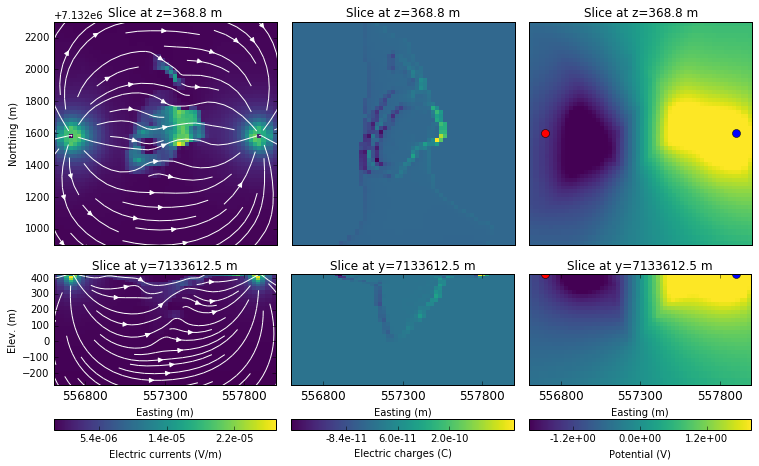

In [28]:
interact(lambda indz,indy: dataPanelPlot(indz,indy), indz=IntSlider(min=0, max=mesh.nCz-1,step=1, value=28), indy=IntSlider(min=0, max=mesh.nCy-1,step=1, value=31))

## Compute DC data

In [29]:
# Evaluate at Rx locations
dobs = survey.dpred(mtrue, f=f)

In [30]:
obsdata = Survey.Data(survey, v=dobs)
Xx = 0.5*(Mx[:,0]+Nx[:,0]).reshape((23, 24), order="F")
Yx = Mx[:,1].reshape((23, 24), order="F")

## Visualize DC data

In [31]:
def vizdata(data, src, rx, rxcomponent="X", clim=None, title=None, figsave=None, ax=None, cb=True,cbOrient="vertical"):
    if ax is None:
        fig = plt.figure(figsize=(6.8, 5.5))
        ax = plt.subplot(111)

    temp = data[src, rx]
    if rxcomponent=="X":
        X = Xx.copy()
        Y = Yx.copy()
    else:
        X = Xy.copy()
        Y = Yy.copy()
    temp = temp.reshape(X.shape, order="F")
    if clim is not None:
        vmin, vmax = clim[0], clim[1]
        dat = ax.contourf(X, Y, temp, 20, clim=clim, vmin=vmin, vmax=vmax, cmap="plasma")
        ax.contour(X, Y, temp, 10, colors="k")
    else:
        vmin, vmax = temp.min(), temp.max()
        dat = ax.contourf(X, Y, temp, 20, cmap="plasma")
        ax.contour(X, Y, temp, 10, colors="k")
        
    if title is not None:
        ax.set_title(title)
    xmin, xmax = X.min(), X.max()
    ymin, ymax = Y.min(), Y.max()            
    ax.set_xlabel("Easting (m)")
    ax.set_ylabel("Northing (m)")
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.set_xticks(np.linspace(xmin, xmax, 3))
    ax.set_yticks(np.linspace(ymin, ymax, 3))
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)            
    
    if cb:
        cb = plt.colorbar(dat, orientation=cbOrient, ticks=np.linspace(vmin, vmax, 3), format="%.1e")
        cb.set_label("Potential (V)")
        
    if figsave is not None:
        fig.savefig(figsave, dpi=200)
    return ax
    

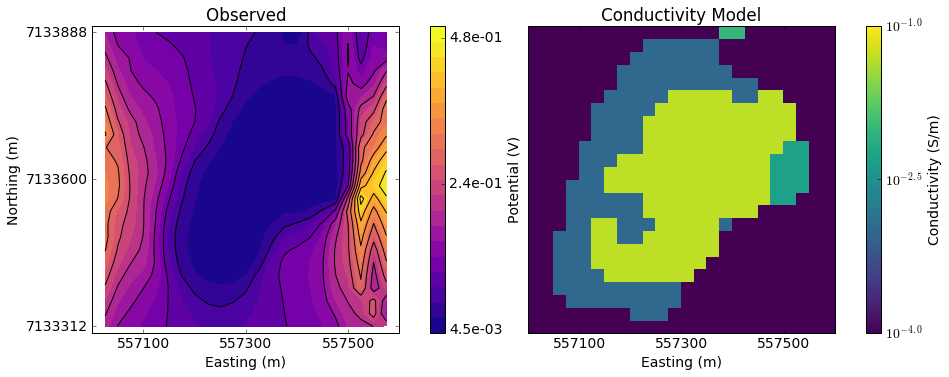

In [32]:
fig = plt.figure(figsize(11, 5.5))
xmin, xmax = -300+xc, 300+xc
ymin, ymax = -300+yc, 300+yc
indz = 28
matplotlib.rcParams['font.size'] = 14
# Axis label
x = np.linspace(xmin+100, xmax-100,3)

# DC observed data
ax1 = plt.subplot(1,1,1)
pos =  ax1.get_position()
ax1.set_position([pos.x0, pos.y0,  pos.width*0.5, pos.height])
ax1 = vizdata(obsdata, src1, rx_x, ax=ax1, rxcomponent="X", title="Observed", clim=(4.5e-3, 4.8e-1))
plt.gca().set_aspect('equal')
# ax1.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
# ax1.xaxis.set_visible(False)
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)   
ax1.set_xticks(map(int, x))
ax1.set_xticklabels(map(str, map(int, x)),size=14)
ax1.set_xlabel('Easting (m)')
ax1.set_ylabel('Northing (m)')
ax1.set

# True conductivity model
ax2 = fig.add_axes([pos.x0+0.55, pos.y0,  pos.width, pos.height])
ax2,dat2 = viz(mesh, sigma, indz, airind, normal="Z", xc=xc, yc=yc, zc=zc, ax=ax2)
plt.gca().set_aspect('equal')
ax2.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
ax2.yaxis.set_visible(False)
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
ax2.set_xticks(map(int, x))
ax2.set_xticklabels(map(str, map(int, x)),size=14)
ax2.set_xlabel('Easting (m)')
ax2.set_title('Conductivity Model')

## Load inversion results

In [33]:
import pickle
# Load inversion results
DCresults_withdepth = pickle.load(open( "DCresults", "rb" ))
# print DCresults_withdepth.keys()

# Get inversion model
sigopt_withdepth = DCresults_withdepth['sigma_inv']

# Get predicted data
dpred = DCresults_withdepth['Pred']
preddata = Survey.Data(survey, v=dpred)

In [34]:
def compareTrueRecoveredMod(indz,indy):
    fig = plt.figure(figsize(11, 8))
    vmin, vmax = -4, -1
    xmin, xmax = -500+xc, 500+xc
    ymin, ymax = -500+yc, 500+yc
    zmin, zmax = -500+zc, 0+zc
#     indz = 28
#     indy = 31
    # Axis label
    x = np.linspace(xmin+200, xmax-200,3)
    matplotlib.rcParams['font.size'] = 10

    # True Conductivity Model z-section
    ax1 = plt.subplot(1,1,1)
    pos =  ax1.get_position()
    ax1.set_position([pos.x0-0.1, pos.y0+0.3,  pos.width*0.5, pos.height*0.5])
    ax1,dat1 = viz(mesh, sigma, indz, airind, normal="Z", xc=xc,yc=yc,zc=zc, ax=ax1, cb=False, clim=(vmin, vmax))
    plt.gca().set_aspect('equal')
    ax1.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
    ax1.xaxis.set_visible(False)
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)    
    ax1.set_ylabel('Northing (m)')

    # True Conductivity Model y-section
    pos =  ax1.get_position()
    ax2 = fig.add_axes([pos.x0+0.0525, pos.y0 - 0.36,  pos.width*0.725, pos.height])
    ax2, dat2 = viz(mesh, sigma, indy, airind, normal="Y", xc=xc,yc=yc,zc=zc, ax=ax2, cb=False, clim=(vmin, vmax))
    plt.gca().set_aspect('equal')
    ax2.set_title(("Slice at y=%.1f m")%(mesh.vectorCCy[indy]))
    ax2.set_xlim(xmin, xmax)
    ax2.set_ylim(zmin, zmax) 
    ax2.set_xticks(map(int, x))
    ax2.set_xticklabels(map(str, map(int, x)),size=12)
    ax2.set_xlabel('Easting (m)')
    ax2.set_ylabel('Elev. (m)')

    # DC Recovered Model z-section
    ax3 = fig.add_axes([pos.x0+0.3, pos.y0,  pos.width, pos.height])
    ax3,dat3 = ax = viz(mesh, sigopt_withdepth, indz, airind, normal="Z", xc=xc,yc=yc,zc=zc, ax=ax3, cb=False, clim=(vmin, vmax))
    plt.gca().set_aspect('equal')
    ax3.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
    ax3.xaxis.set_visible(False)
    ax3.yaxis.set_visible(False)
    ax3.set_xlim(xmin, xmax)
    ax3.set_ylim(ymin, ymax)

    # DC Recovered Model y-section
    ax4 = fig.add_axes([pos.x0+0.3525, pos.y0 - 0.36,  pos.width*0.725, pos.height])
    ax4, dat4 = viz(mesh, sigopt_withdepth, indy, airind,  normal="Y", xc=xc,yc=yc,zc=zc, ax=ax4, cb=False, clim=(vmin, vmax))
    plt.gca().set_aspect('equal')
    ax4.set_title(("Slice at y=%.1f m")%(mesh.vectorCCy[indy]))
    ax4.yaxis.set_visible(False)
    ax4.set_xlim(xmin, xmax)
    ax4.set_ylim(zmin, zmax) 
    ax4.set_xticks(map(int, x))
    ax4.set_xticklabels(map(str, map(int, x)),size=12)
    ax4.set_xlabel('Easting (m)')

    pos =  ax4.get_position()
    cbarax = fig.add_axes([pos.x0-0.15 , pos.y0-0.01 ,  pos.width, pos.height*0.05])  ## the parameters are the specified position you set
    cb = fig.colorbar(dat4[0],cax=cbarax, orientation="horizontal", ax = ax4, ticks=np.linspace(vmin,vmax, 4), format="1.e%.f")
    cb.set_label("Conductivity (S/m)",size=12)

<function __main__.<lambda>>

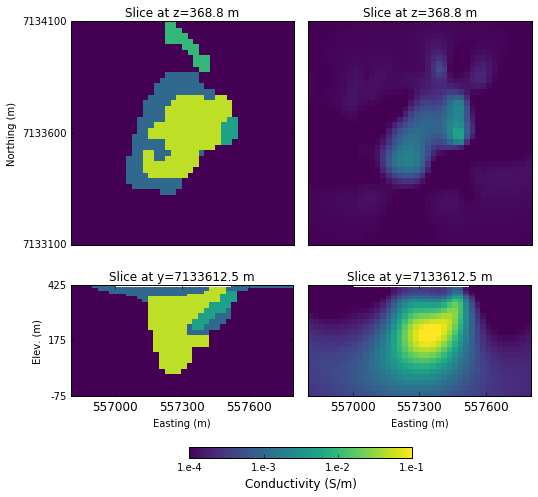

In [35]:
interact(lambda indz,indy: compareTrueRecoveredMod(indz,indy), indz=IntSlider(min=0, max=mesh.nCz-1,step=1, value=28), indy=IntSlider(min=0, max=mesh.nCy-1,step=1, value=31))

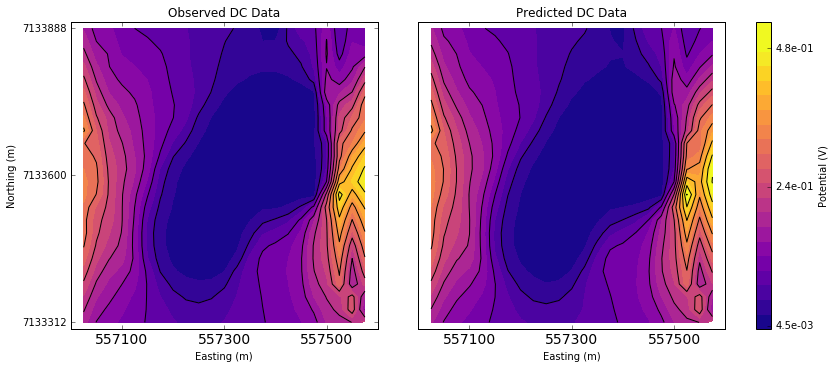

In [36]:
fig = plt.figure(figsize(11, 5.5))
xmin, xmax = -300+xc, 300+xc
ymin, ymax = -300+yc, 300+yc
indz = 28

# Axis label
x = np.linspace(xmin+100, xmax-100,3)

# DC observed data
ax1 = plt.subplot(1,1,1)
pos =  ax1.get_position()
ax1.set_position([pos.x0-0.4, pos.y0,  pos.width, pos.height])
ax1 = vizdata(obsdata, src1, rx_x, ax=ax1, rxcomponent="X", title="Observed DC Data", clim=(4.5e-3, 4.8e-1), cb=False)
plt.gca().set_aspect('equal')
# ax1.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
# ax1.xaxis.set_visible(False)
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)   
ax1.set_xticks(map(int, x))
ax1.set_xticklabels(map(str, map(int, x)),size=14)
ax1.set_xlabel('Easting (m)')
ax1.set_ylabel('Northing (m)')

# DC Predicted data
ax2 = fig.add_axes([pos.x0, pos.y0,  pos.width, pos.height])
ax2 = vizdata(preddata, src1, rx_x, ax=ax2, rxcomponent="X", title="Predicted DC Data", clim=(4.5e-3, 4.8e-1))
plt.gca().set_aspect('equal')
ax2.yaxis.set_visible(False)
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
ax2.set_xticks(map(int, x))
ax2.set_xticklabels(map(str, map(int, x)),size=14)
ax2.set_xlabel('Easting (m)')